In [2]:
import keras
import pandas as pd
import numpy as np

In [3]:
import keras.datasets
from keras.preprocessing import image_dataset_from_directory
from keras import Sequential, layers, models, callbacks, losses, optimizers, metrics

In [4]:
(X_train, y_train),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
#no need to flatten just normalise
X_train = X_train.astype('float32')/255.0 #dividing by pixels max value
X_test = X_test.astype('float32')/255.0 #dividing by pixels max

**for CNN the expected dimension is 4D as a result, we expand dimension, (batch_size, height, width, channels).
done to understand the grey scale of image**

In [9]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

***flatten during before dense layers, EXPAND during before CNN***

In [10]:
X_train.shape

(60000, 28, 28, 1)

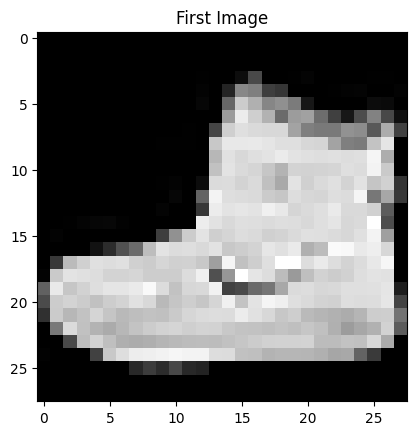

In [11]:
import matplotlib.pyplot as plt

image = X_train[0]  # Extract the first image

# Plot the image
plt.imshow(image, cmap = 'gray')  # Display in grayscale
plt.title("First Image")
plt.show()

In [12]:
type(X_train)

numpy.ndarray

In [13]:
X_train[0].shape

(28, 28, 1)

In [14]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
num_classes = 10
#here num_classes is number of output classes
input_shape = (28,28,1)

In [16]:
model = keras.Sequential(
    [
     #defining 1st input layer
     keras.layers.Input(shape = input_shape),
     #defining CNN with relu 2 layers 64 filters
     keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
     keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
     #Max pooling
     keras.layers.MaxPooling2D(pool_size = (2,2)),
     #defining CNN with relu 2 layers 128 filters
     keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
     keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
     #average pooling
     keras.layers.GlobalAveragePooling2D(),
     #dropout
     keras.layers.Dropout(0.5),
     #full CNN connected to last dense layer with softmax
     keras.layers.Dense(num_classes, activation = 'softmax'),
     ]
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
              loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = [
                  keras.metrics.SparseCategoricalAccuracy(name = 'categ'), 'accuracy'
              ])

**fitting model**

In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss'),
]
history = model.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_split = 0.15, callbacks = callbacks)

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8491 - categ: 0.8491 - loss: 0.4199 - val_accuracy: 0.8749 - val_categ: 0.8749 - val_loss: 0.3426
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8597 - categ: 0.8597 - loss: 0.3866 - val_accuracy: 0.8841 - val_categ: 0.8841 - val_loss: 0.3240
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8688 - categ: 0.8688 - loss: 0.3737 - val_accuracy: 0.8770 - val_categ: 0.8770 - val_loss: 0.3315
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8730 - categ: 0.8730 - loss: 0.3581 - val_accuracy: 0.8924 - val_categ: 0.8924 - val_loss: 0.2923
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8807 - categ: 0.8807 - loss: 0.3419 - val_accuracy: 0.8920 - val_categ: 0.8920 - val_loss: 0.2900
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8824 - categ: 0.8824 - loss: 0.3316 - val_accuracy: 0.8883 - val_categ: 0.8883 - val_loss: 0.2993
Epoch 7/20

In [21]:
model.save('final_mnist_model.keras')

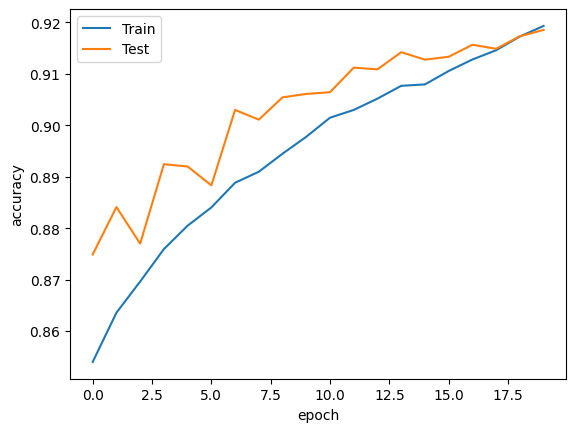

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'])
plt.show()

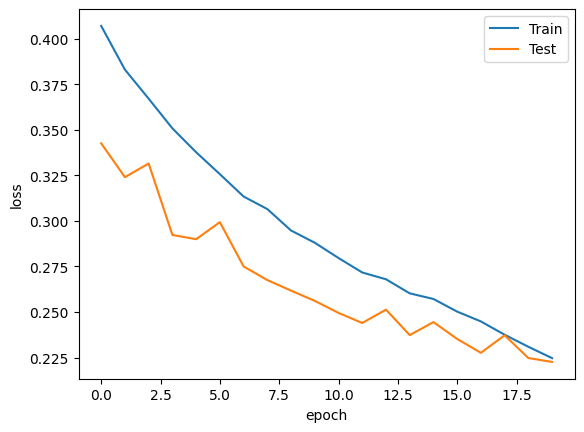

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'])
plt.show()

In [27]:
model.save('trained_model_mnist.h5')